# Importy/Imports

In [73]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
! pip install folium
import folium

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.0 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Załadowanie danych/Data loading

In [74]:
with zipfile.ZipFile('bulidata.csv.zip', 'r') as file:
    file.extractall('')
    
df = pd.read_csv('bulidata.csv')
df

,Unnamed: 0,MATCH_DATE,LEAGUE_NAME,SEASON,LEAGUE,FINISHED,LOCATION,VIEWER,MATCHDAY,MATCHDAY_NR,...,HOME_ICON,AWAY_TEAM_ID,AWAY_TEAM_NAME,AWAY_TEAM,AWAY_ICON,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY
0,0,2005-08-05 20:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,München,NaN,1. Spieltag,1,...,https://i.imgur.com/jJEsJrj.png,87,Borussia Mönchengladbach,Gladbach,https://i.imgur.com/KSIk0Eu.png,3,0,0.0,1.0,0.0
1,1,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Köln,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/en/thum...,81,1. FSV Mainz 05,Mainz,https://upload.wikimedia.org/wikipedia/commons...,1,0,0.0,1.0,0.0
2,2,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Duisburg,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/en/c/c8...,16,VfB Stuttgart,Stuttgart,https://i.imgur.com/v0tkpNx.png,1,1,1.0,0.0,0.0
3,3,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Hamburg,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/commons...,79,1. FC Nürnberg,Nürnberg,https://upload.wikimedia.org/wikipedia/commons...,3,0,0.0,1.0,0.0
4,4,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Wolfsburg,NaN,1. Spieltag,1,...,https://i.imgur.com/ucqKV4B.png,7,Borussia Dortmund,BVB,https://upload.wikimedia.org/wikipedia/commons...,2,2,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,5505,2023-05-27 15:30:00,1. Fußball-Bundesliga 2022/2023,2022,bl1,True,Köln,NaN,34. Spieltag,34,...,https://upload.wikimedia.org/wikipedia/en/thum...,40,FC Bayern München,Bayern,https://i.imgur.com/jJEsJrj.png,1,2,0.0,0.0,1.0
5504,5506,2023-05-27 15:30:00,1. Fußball-Bundesliga 2022/2023,2022,bl1,True,Leipzig,NaN,34. Spieltag,34,...,https://i.imgur.com/Rpwsjz1.png,9,FC Schalke 04,Schalke,https://upload.wikimedia.org/wikipedia/commons...,4,2,0.0,1.0,0.0
5505,5507,2023-05-27 15:30:00,1. Fußball-Bundesliga 2022/2023,2022,bl1,True,Stuttgart,NaN,34. Spieltag,34,...,https://i.imgur.com/v0tkpNx.png,175,TSG 1899 Hoffenheim,Hoffenheim,https://i.imgur.com/gF0PfEl.png,1,1,1.0,0.0,0.0
5506,5508,2023-05-27 15:30:00,1. Fußball-Bundesliga 2022/2023,2022,bl1,True,Berlin,NaN,34. Spieltag,34,...,https://assets.dfb.de/uploads/000/018/232/smal...,134,Werder Bremen,Bremen,https://upload.wikimedia.org/wikipedia/commons...,1,0,0.0,1.0,0.0


# Wstępna analiza/Preliminary analysis

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5508 non-null   int64  
 1   MATCH_DATE      5508 non-null   object 
 2   LEAGUE_NAME     5508 non-null   object 
 3   SEASON          5508 non-null   int64  
 4   LEAGUE          5508 non-null   object 
 5   FINISHED        5508 non-null   bool   
 6   LOCATION        5508 non-null   object 
 7   VIEWER          1682 non-null   float64
 8   MATCHDAY        5508 non-null   object 
 9   MATCHDAY_NR     5508 non-null   int64  
 10  HOME_TEAM_ID    5508 non-null   int64  
 11  HOME_TEAM_NAME  5508 non-null   object 
 12  HOME_TEAM       5508 non-null   object 
 13  HOME_ICON       5508 non-null   object 
 14  AWAY_TEAM_ID    5508 non-null   int64  
 15  AWAY_TEAM_NAME  5508 non-null   object 
 16  AWAY_TEAM       5474 non-null   object 
 17  AWAY_ICON       5508 non-null   o

In [76]:
df.isnull().any()

Unnamed: 0        False
MATCH_DATE        False
LEAGUE_NAME       False
SEASON            False
LEAGUE            False
FINISHED          False
LOCATION          False
VIEWER             True
MATCHDAY          False
MATCHDAY_NR       False
HOME_TEAM_ID      False
HOME_TEAM_NAME    False
HOME_TEAM         False
HOME_ICON         False
AWAY_TEAM_ID      False
AWAY_TEAM_NAME    False
AWAY_TEAM          True
AWAY_ICON         False
GOALS_HOME        False
GOALS_AWAY        False
DRAW              False
WIN_HOME          False
WIN_AWAY          False
dtype: bool

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5508.0,2755.055556,1590.765865,0.0,1378.75,2755.5,4132.25,5509.0
SEASON,5508.0,2013.500000,5.188598,2005.0,2009.00,2013.5,2018.00,2022.0
VIEWER,1682.0,41841.023781,18057.421146,0.0,28176.25,41000.0,52121.00,81365.0
MATCHDAY_NR,5508.0,17.500000,9.811599,1.0,9.00,17.5,26.00,34.0
HOME_TEAM_ID,5508.0,109.762346,231.486413,6.0,40.00,81.0,112.00,1635.0
AWAY_TEAM_ID,5508.0,109.762346,231.486413,6.0,40.00,81.0,112.00,1635.0
GOALS_HOME,5508.0,1.394336,1.299628,0.0,0.00,1.0,2.00,9.0
GOALS_AWAY,5508.0,1.075527,1.131180,0.0,0.00,1.0,2.00,8.0
DRAW,5508.0,0.290668,0.454112,0.0,0.00,0.0,1.00,1.0
WIN_HOME,5508.0,0.425744,0.494500,0.0,0.00,0.0,1.00,1.0


In [78]:
df.duplicated().sum()

0

# Czyszczenie danych/Dataset cleaning

In [79]:
'''Zmiana wielkości liter w nazwach kolumn na małe.
Converting columns names into lower case.'''
df.columns = df.columns.str.lower()

'''Złączenie trzech kolumn odnośnie zwycięzcy do jednej kolumny. 
Merging 3 columns with information about winner to 1 single column.'''
df['match_result'] = df[['draw', 'win_home', 'win_away']].idxmax(axis = 1)

'''Zmiana typu danych w kolumnie match_date na datetime.
Converting match_date column to datetime.'''
df['match_date'] = pd.to_datetime(df['match_date'])

'''Utworzenie kolumn game_month, game_day i game_hour.
Creating game_month, game_day and game_hour columns.'''
df['game_year'] = df['match_date'].dt.year
df['game_month'] = df['match_date'].dt.month_name()
df['game_day'] = df['match_date'].dt.day_name()
df['hour_game'] = df['match_date'].dt.time

'''Utworzenie kolumny match_result z kolumn draw, win_home i win_away.
 Creating match_result column by draw, win_home and win_away columns.'''
def change_match_result(result):
    if result == "win_home":
        return "home team"
    elif result == "win_away":
        return "away team"
    else:
        return "draw"
    
df['winner'] = df['match_result'].apply(change_match_result)

'''Dodanie w kolumnie season drugiej informacji odnośnie sezonu (drugi rok sezonu, w którym są rozgrywane mecze).
Changing season column to added second part of information about season (second year the season is played).'''
df['season'] = df['season'].apply(lambda x: str(x) + '/' + str(x + 1))

'''Usunięcie kolumn niepotrzebnych do analizy.
Removing columns not relevant to the analysis.'''
df.drop(columns = ['unnamed: 0', 'league_name', 'match_date', 'matchday', 'match_result', 'league', 'finished', 'home_icon',
                   'away_icon', 'home_team', 'away_team', 'home_team_id', 'away_team_id'], inplace = True)

df

,season,location,viewer,matchday_nr,home_team_name,away_team_name,goals_home,goals_away,draw,win_home,win_away,game_year,game_month,game_day,hour_game,winner
0,2005/2006,München,NaN,1,FC Bayern München,Borussia Mönchengladbach,3,0,0.0,1.0,0.0,2005,August,Friday,20:30:00,home team
1,2005/2006,Köln,NaN,1,1. FC Köln,1. FSV Mainz 05,1,0,0.0,1.0,0.0,2005,August,Saturday,15:30:00,home team
2,2005/2006,Duisburg,NaN,1,MSV Duisburg,VfB Stuttgart,1,1,1.0,0.0,0.0,2005,August,Saturday,15:30:00,draw
3,2005/2006,Hamburg,NaN,1,Hamburger SV,1. FC Nürnberg,3,0,0.0,1.0,0.0,2005,August,Saturday,15:30:00,home team
4,2005/2006,Wolfsburg,NaN,1,VfL Wolfsburg,Borussia Dortmund,2,2,1.0,0.0,0.0,2005,August,Saturday,15:30:00,draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,2022/2023,Köln,NaN,34,1. FC Köln,FC Bayern München,1,2,0.0,0.0,1.0,2023,May,Saturday,15:30:00,away team
5504,2022/2023,Leipzig,NaN,34,RB Leipzig,FC Schalke 04,4,2,0.0,1.0,0.0,2023,May,Saturday,15:30:00,home team
5505,2022/2023,Stuttgart,NaN,34,VfB Stuttgart,TSG 1899 Hoffenheim,1,1,1.0,0.0,0.0,2023,May,Saturday,15:30:00,draw
5506,2022/2023,Berlin,NaN,34,1. FC Union Berlin,Werder Bremen,1,0,0.0,1.0,0.0,2023,May,Saturday,15:30:00,home team


# Eksploracyjna analiza danych/Exploratory Data Analysis

### Analiza sezonów/Seasons analysis

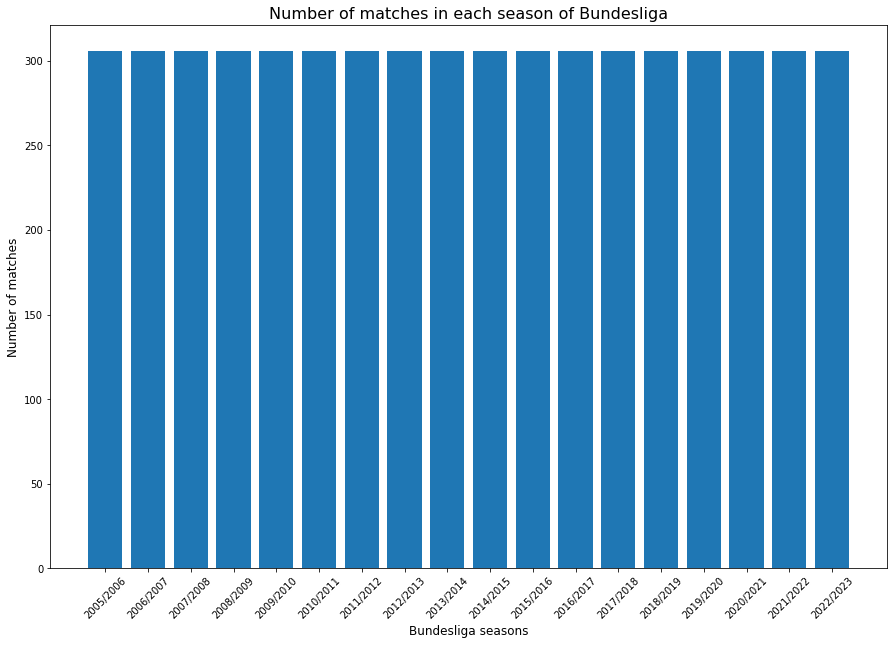

In [80]:
height = df['season'].value_counts()
bars = ['2005/2006', '2006/2007', '2007/2008', '2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015',
        '2015/2016', '2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021', '2021/2022', '2022/2023']
y_pos = np.arange(len(height))

plt.figure(figsize = (15, 10))

plt.bar(x = y_pos, height = height)
plt.xticks(y_pos, labels = bars, rotation = 45)

plt.xlabel('Bundesliga seasons', fontsize = 12)
plt.ylabel('Number of matches', fontsize = 12)
plt.title('Number of matches in each season of Bundesliga', fontsize = 16)

plt.show()

W każdym sezonie została rozegrana taka sama liczba meczów. Zgodnie w każdym sezonie rozegrano 306 meczów. Widać to również na wykresie.

The same number of matches were played each season. Acording to the conclusion, 306 matches were played in each season. This can also be seen in the graph. 

### Analiza lokalizacji/Location analysis

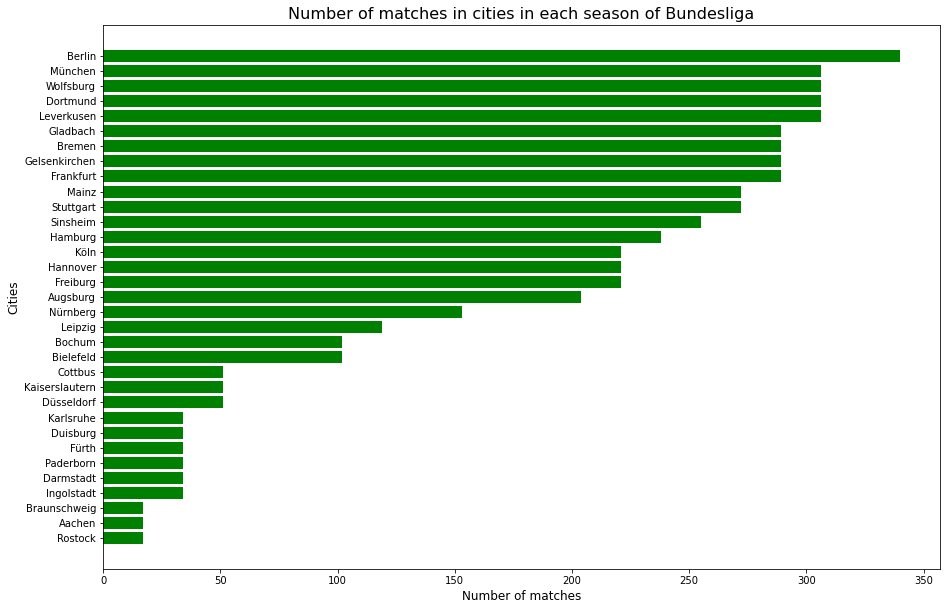

In [81]:
matches_count = df['location'].value_counts().reset_index()
matches_count.columns = ['location', 'matches']
matches_count = matches_count.sort_values(by = 'matches')

plt.figure(figsize = (15, 10))

plt.barh(matches_count['location'], matches_count['matches'], color = 'green')

plt.xlabel('Number of matches', fontsize = 12)
plt.ylabel('Cities', fontsize = 12)
plt.title('Number of matches in cities in each season of Bundesliga', fontsize = 16)

plt.show()

W uprzednio analizowanych sezonach najwięcej meczów rozegranych w Bundeslidze zostało rozegranych w Berlinie, a następnie w Monachium, Wolfsburgu, Dortmundzie i Leverkusen. Po drugiej stronie znajdują się miasta takie jak Brunszwik, Akwizgran i Rostock.

In previously analyzed seasons the most matches in the Bundesliga was played in Berlin and then in München, Wolfsburg, Dortmund and Leverkusen. On the other side there are cities like Braunschweig, Aachen and Rostock.

In [82]:
map = folium.Map(location = [51.00, 9.00],
                 zoom_start = 6)

folium.Marker([52.5243700, 13.4105300],
              popup = '<b>Berlin (340 matches)<b>').add_to(map)
folium.Marker([48.1374300, 11.5754900],
              popup = '<b>München (306 matches)<b>').add_to(map)
folium.Marker([52.416667, 10.783333],
              popup = '<b>Wolfsburg (306 matches)<b>').add_to(map)
folium.Marker([51.5149400, 7.4660000],
              popup = '<b>Dortmund (306 matches)<b>').add_to(map)
folium.Marker([51.0303000, 6.9843200],
              popup = '<b>Leverkusen (306 matches)<b>').add_to(map)
folium.Marker([51.1853900, 6.4417200],
              popup = '<b>Gladbach (289 matches)<b>').add_to(map)
folium.Marker([53.0751600, 8.8077700],
              popup = '<b>Bremen (289 matches)<b>').add_to(map)
folium.Marker([51.5075000, 7.1228300],
              popup = '<b> Gelsenkirchen (289 matches)<b>').add_to(map)
folium.Marker([50.1155200, 8.6841700],
              popup = '<b>Franfurt (289 matches)<b>').add_to(map)
folium.Marker([49.9841900, 8.2791000],
              popup = '<b>Mainz (272 matches)<b>').add_to(map)
folium.Marker([48.7823200, 9.1770200],
              popup = '<b>Stuttgart (272 matches)<b>').add_to(map)
folium.Marker([49.2529000, 8.8786700],
              popup = '<b>Sinsheim (255 matches)<b>').add_to(map)
folium.Marker([53.5753200, 10.0153400],
              popup = '<b>Hamburg (238 matches)<b>').add_to(map)
folium.Marker([52.3705200, 9.7332200],
              popup = '<b>Hannover (221 matches)<b>').add_to(map)
folium.Marker([47.9959000, 7.8522200],
              popup = '<b>Freiburg (221 matches)<b>').add_to(map)
folium.Marker([50.9333300, 6.9500000],
              popup = '<b>Köln (221 matches)<b>').add_to(map)
folium.Marker([48.3715400, 10.8985100],
              popup = '<b>Augsburg (204 matches)<b>').add_to(map)
folium.Marker([49.4542100, 11.0775200],
              popup = '<b>Nürnberg (153 matches)<b>').add_to(map)
folium.Marker([51.3396200, 12.3712900],
              popup = '<b>Liepzig (119 matches)<b>').add_to(map)
folium.Marker([51.4816500, 7.2164800],
              popup = '<b>Bochum (102 matches)<b>').add_to(map)
folium.Marker([52.0333300, 8.5333300],
              popup = '<b>Bielefeld (102 matches)<b>').add_to(map)
folium.Marker([51.7576900, 14.3288800],
              popup = '<b>Cottbus (51 matches)<b>').add_to(map)
folium.Marker([49.4430000, 7.7716100],
              popup = '<b>Kaiserslautern (51 matches)<b>').add_to(map)
folium.Marker([51.2217200, 6.7761600],
              popup = '<b>Düsseldorf (51 matches)<b>').add_to(map)
folium.Marker([49.0093700, 8.4044400],
              popup = '<b>Karlsruhe (34 matches)<b>').add_to(map)
folium.Marker([51.4324700, 6.7651600],
              popup = '<b>Duisburg (34 matches)<b>').add_to(map)
folium.Marker([49.4759300, 10.9885600],
              popup = '<b>Fürth (34 matches)<b>').add_to(map)
folium.Marker([51.7190500, 8.7543900],
              popup = '<b>Paderborn (34 matches)<b>').add_to(map)
folium.Marker([49.8716700, 8.6502700],
              popup = '<b>Darmstadt (34 matches)<b>').add_to(map)
folium.Marker([48.7650800, 11.4237200],
              popup = '<b>Ingolstadt (34 matches)<b>').add_to(map)
folium.Marker([50.7766400, 6.0834200],
              popup = '<b>Aachen (17 matches)<b>').add_to(map)
folium.Marker([52.2659400, 10.5267300],
              popup = '<b>Braunschweig (17 matches)<b>').add_to(map)
folium.Marker([54.0887000, 12.1404900],
              popup = '<b>Rostock (17 matches)<b>').add_to(map)

map

Po rozmieszczeniu miast na mapie Niemiec widać, że rozkład jest dość równomierny. Istnieją jednak duże skupiska miast, które grały w Budneslidze we wspomnianych sezonach w bardziej zachodniej i południowej części kraju. Największa koncentracja występuje we wschodniej części, w tzw. Zagłębiu Ruhry, przemysłowym sercu Niemiec. Miasta takie jak Dortmund, Gelsenkirchen, Bochum czy Duisburg są blisko siebie. W pobliżu znajdują się również Kolonia, Akwizgran, Düsseldorf, Leverkusen i Gladbach.

After the distribution of cities on the map of Germany, can see that fairly even distribution. However, there are large clusters of cities that played in Budnesliga in the aforementioned seasons in the more western and southern parts of the contry. The largest concentration is in the eastern part, in the so-caller Ruhr area, the industrial heartland of Germany. Cieties such as Dortmund, Gelsenkirchen, Bochum or Duisburg are close to each other. Are also close Köln, Aachen, Düsseldorf, Leverkusen and Gladbach.

### Analiza widzów/Viewiers analysis

In [83]:
print(f'Liczba rekordów w kolumnie viewer/Number of records in viewer column: {len(df["viewer"])}')
print(f'Liczba wartości NaN w kolumnie viewer/Number NaN values in viewer column: {df["viewer"].isna().sum()}')
print(f'Liczba wartości nie NaN w kolumnie viewer/Number not NaN values in the viewer column: {df["viewer"].count()}')
print(f'Procentowy rozkład wartości NaN do wszystkich rekordów w kolumnie viewer/Percentage of NaN values to all records in viewer columns: {df["viewer"].isna().sum() / len(df["viewer"])}')

Liczba rekordów w kolumnie viewer/Number of records in viewer column: 5508
Liczba wartości NaN w kolumnie viewer/Number NaN values in viewer column: 3826
Liczba wartości nie NaN w kolumnie viewer/Number not NaN values in the viewer column: 1682
Procentowy rozkład wartości NaN do wszystkich rekordów w kolumnie viewer/Percentage of NaN values to all records in viewer columns: 0.6946259985475671


In [84]:
df['viewer'].describe()

count     1682.000000
mean     41841.023781
std      18057.421146
min          0.000000
25%      28176.250000
50%      41000.000000
75%      52121.000000
max      81365.000000
Name: viewer, dtype: float64

Prawie 70% wszystkich wartości w kolumnach to wartości NaN. Dlatego dalsza analiza nie ma większego sensu przy tak dużym braku danych. Po wykonaniu metody describe() na wartościach innych niż NaN widać, że uwzględniane są nawet wartości 0.0, co ma miejsce tylko w przypadku zamkniętych stadionów. Poza tym wartości są dość realistyczne i rozkładają się bardzo równomiernie.

Almost 70% of all values int he columns are NaN values. Therefore, further analysis doesn't make much sense with such a large lack of data. After doing describe() on not NaN values you can see that even 0.0 values are included, which happens only in the case closed stadiums. Besides, the values are quite realistic and are distributed very evenly. 

### Analiza meczów drużyn/Analysis of team matches

In [85]:
'''Utworzenie pomocniczego dataframe df_home.
Creating auxiliary dataset df_home.'''
df_home = df['home_team_name'].value_counts().reset_index()
df_home.columns = ['team_home', 'matches_home']
df_home.sort_values(by = 'team_home', inplace = True)

'''Utworzenie pomocniczego dataframe df_away.
Creating auxiliary dataset df_away.'''
df_away = df['away_team_name'].value_counts().reset_index()
df_away.columns = ['team_away', 'matches_away']
df_away.sort_values(by = 'team_away', inplace = True)

'''Połączenie dwóch pomocniczych datasetów w jeden potrzebny do analizy meczów.
Merging two auxiliary datasets to one necessary to matches analysis'''
df_matches = pd.merge(df_home, df_away['matches_away'], left_index = True, right_index = True)
df_matches.columns = ['team', 'matches_home', 'matches_away']

In [86]:
df_matches.sort_values(by = 'matches_home', inplace = True)
df_matches = df_matches.reset_index()
df_matches.drop(columns = ['index'], inplace = True)
df_matches['total_matches'] = df_matches['matches_home'] + df_matches['matches_away']
df_matches

,team,matches_home,matches_away,total_matches
0,FC St. Pauli,17,17,34
1,Alemannia Aachen,17,17,34
2,FC Hansa Rostock,17,17,34
3,Eintracht Braunschweig,17,17,34
4,SV Darmstadt 98,34,34,68
5,MSV Duisburg,34,34,68
6,Karlsruher SC,34,34,68
7,SC Paderborn 07,34,34,68
8,FC Ingolstadt 04,34,34,68
9,SpVgg Greuther Fürth,34,34,68


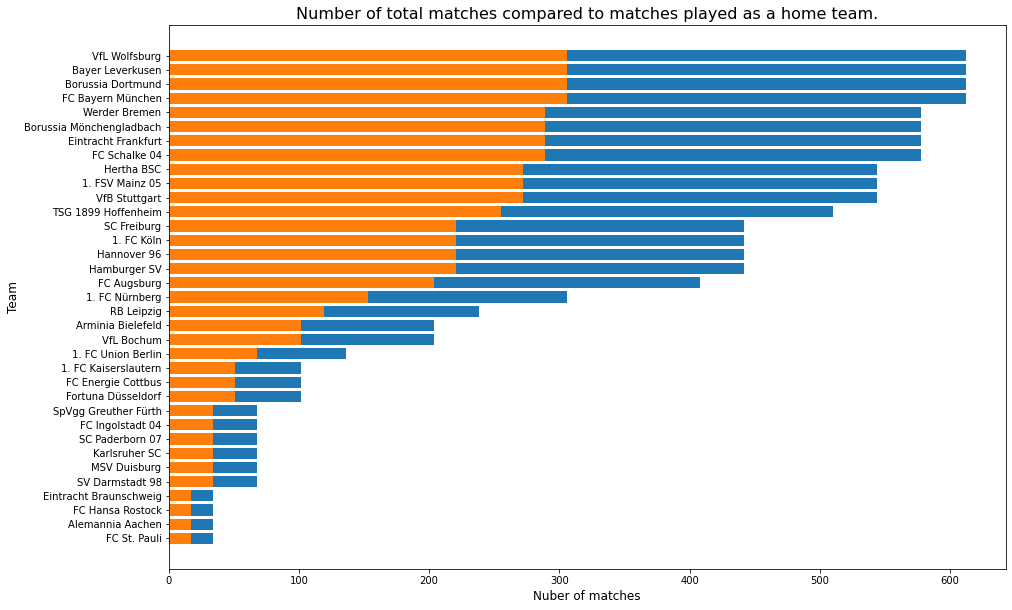

In [87]:
'''Wizualizacja na wykresie kolumnowym poziomym wszystkich meczów danej drużyny do meczów roygrzwanzch jako gospodarz.
Vizualization on the horizontal column chart of total matches of the team to matches played like home team.'''
plt.figure(figsize = (15, 10))

plt.barh(df_matches['team'], df_matches['total_matches'])
plt.barh(df_matches['team'], df_matches['matches_home'])

plt.xlabel('Number of matches', fontsize = 12)
plt.ylabel('Team', fontsize = 12)
plt.title('Number of total matches compared to matches played as a home team.', fontsize = 16)

plt.show()

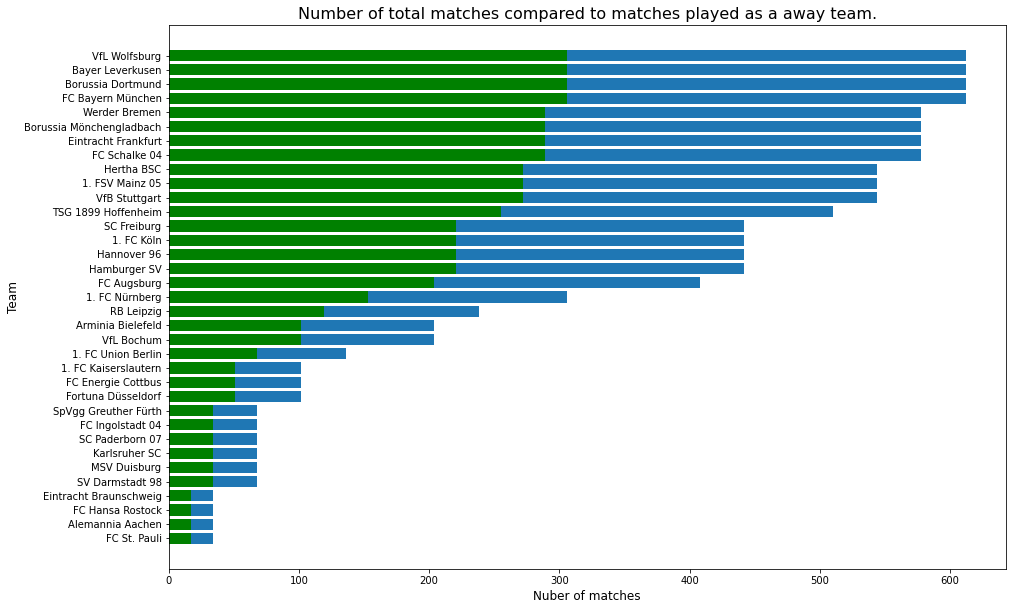

In [88]:
'''Wizualizacja na wykresie kolumnowym poziomym wszystkich meczów danej drużyny do meczów rozgrywanych jako gość.
Vizualization on the horizontal column chart of total matches of the team to matches played like away team.'''
plt.figure(figsize = (15, 10))

plt.barh(df_matches['team'], df_matches['total_matches'])
plt.barh(df_matches['team'], df_matches['matches_away'], color = 'green')

plt.xlabel('Number of matches', fontsize = 12)
plt.ylabel('Team', fontsize = 12)
plt.title('Number of total matches compared to matches played as a away team.', fontsize = 16)

plt.show()